In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [4]:
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
svc = SVC()
lr = LogisticRegression()

In [5]:
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8688524590163934

In [6]:
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7704918032786885

In [7]:
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_test,y_pred)

0.7049180327868853

In [8]:
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_test,y_pred)

c:\work_repo\AI_ML_DS_GenAI_Portfolio\.myvenv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8852459016393442

In [9]:
rf = RandomForestClassifier(max_samples=0.75,random_state=42)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9016393442622951

In [10]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(RandomForestClassifier(max_samples=0.75),X,y,cv=10,scoring='accuracy'))

np.float64(0.8313978494623656)

In [11]:
# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

# 108 diff random forest train

In [12]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples
             }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [13]:
rf = RandomForestClassifier()

In [14]:
from sklearn.model_selection import GridSearchCV

rf_grid = GridSearchCV(estimator = rf, 
                       param_grid = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)

In [15]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


,estimator,RandomForestClassifier()
,param_grid,"{'max_depth': [2, 8, ...], 'max_features': [0.2, 0.6, ...], 'max_samples': [0.5, 0.75, ...], 'n_estimators': [20, 60, ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,60


In [16]:
rf_grid.best_params_

{'max_depth': None,
 'max_features': 0.2,
 'max_samples': 0.5,
 'n_estimators': 60}

In [17]:
# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

# Bootstrap samples
bootstrap = [True,False]

# Minimum number of samples required to split a node
min_samples_split = [2, 5]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

In [18]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples,
              'bootstrap':bootstrap,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf
             }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0], 'bootstrap': [True, False], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}


In [19]:
from sklearn.model_selection import RandomizedSearchCV

rf_grid = RandomizedSearchCV(estimator = rf, 
                       param_distributions = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)

In [20]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\work_repo\AI_ML_DS_GenAI_Portfolio\.myvenv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\work_repo\AI_ML_DS_GenAI_Portfolio\.myvenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\work_repo\AI_ML_DS_GenAI_Portfolio\.myvenv\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\work_repo\AI_ML_DS_GenAI_Portfolio\.myvenv\Li

,estimator,RandomForestClassifier()
,param_distributions,"{'bootstrap': [True, False], 'max_depth': [2, 8, ...], 'max_features': [0.2, 0.6, ...], 'max_samples': [0.5, 0.75, ...], ...}"
,n_iter,10
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [21]:
rf_grid.best_score_

np.float64(0.8181122448979592)

In [22]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('train.csv')

In [23]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

<Axes: >

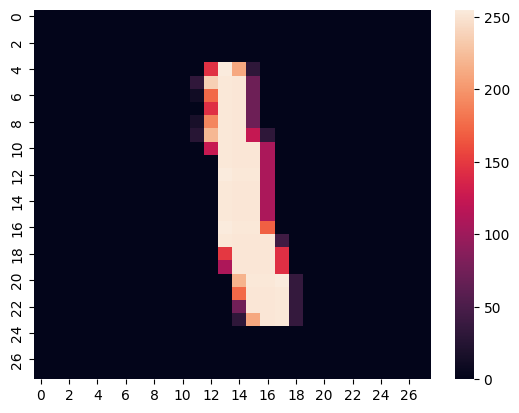

In [24]:
sns.heatmap(X.iloc[5].values.reshape(28,28))

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X,y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [26]:
rf.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.33439857e-07, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.97617492e-07, 1.76235025e-06, 7.28616883e-07,
       2.50345678e-06, 2.99435049e-06, 3.83255100e-06, 3.79852229e-06,
       2.11146949e-06, 2.62697289e-06, 2.96122191e-06, 4.15081689e-06,
       5.65586753e-06, 5.36503431e-06, 3.67691471e-07, 3.56968289e-07,
       6.63691376e-07, 2.85633103e-06, 5.92802990e-07, 7.28822516e-07,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

<Axes: >

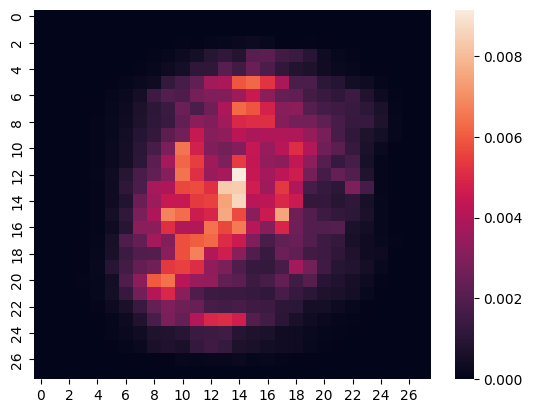

In [27]:
sns.heatmap(rf.feature_importances_.reshape(28,28))

[Text(0.4, 0.8333333333333334, 'x[0] <= -0.875\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[0] <= 1.01\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

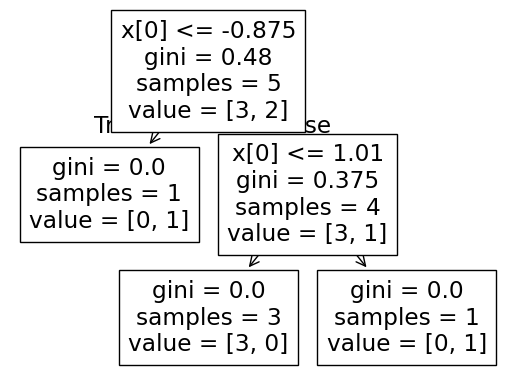

In [3]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

X,y = make_classification(n_samples=5, n_classes=2,
                               n_features=2, n_informative=2, n_redundant=0,
                               random_state=0)

clf = DecisionTreeClassifier()
clf.fit(X,y)
from sklearn.tree import plot_tree
plot_tree(clf)

In [5]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=2)
rf.fit(X,y)
rf.feature_importances_

array([0.5, 0.5])

In [6]:
print(rf.estimators_[0].feature_importances_)
print(rf.estimators_[1].feature_importances_)

[1. 0.]
[0. 1.]


[Text(0.3333333333333333, 0.875, 'x[1] <= -0.383\ngini = 0.498\nsamples = 15\nvalue = [8, 7]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.25, 0.75, 'True  '),
 Text(0.5, 0.625, 'x[0] <= 0.878\ngini = 0.346\nsamples = 9\nvalue = [2, 7]'),
 Text(0.41666666666666663, 0.75, '  False'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.6666666666666666, 0.375, 'x[1] <= -0.278\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')]

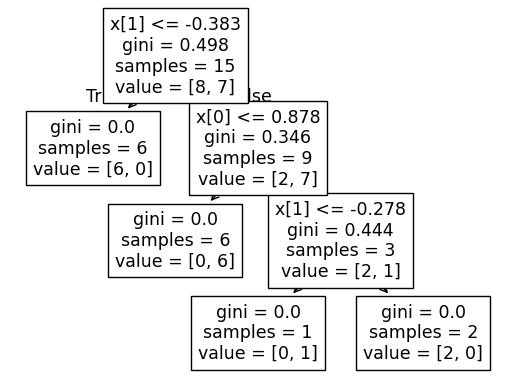

In [7]:
X,y = make_classification(n_samples=15, n_classes=2,
                               n_features=2, n_informative=2, n_redundant=0,
                               random_state=0)
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

clf.fit(X,y)
from sklearn.tree import plot_tree
plot_tree(clf)

In [8]:
clf.feature_importances_

array([0.23809524, 0.76190476])

In [9]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

df = pd.read_csv('heart.csv')
df.head()

X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

rf = RandomForestClassifier(oob_score=True)
rf.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,True


In [10]:
rf.oob_score_

0.8057851239669421

In [11]:
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8524590163934426

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

np.random.seed(42)
X, y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X.shape

(500, 2)

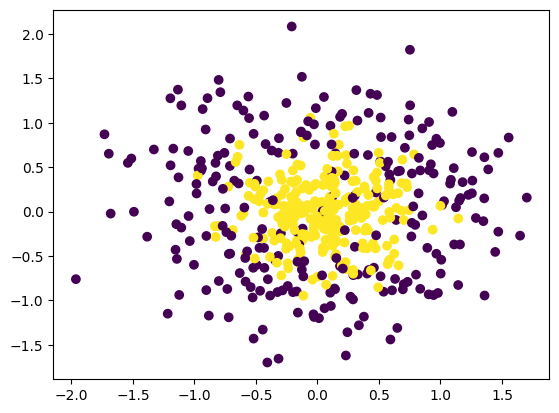

In [13]:
plt.scatter(X[:,0],X[:,1],c=y)

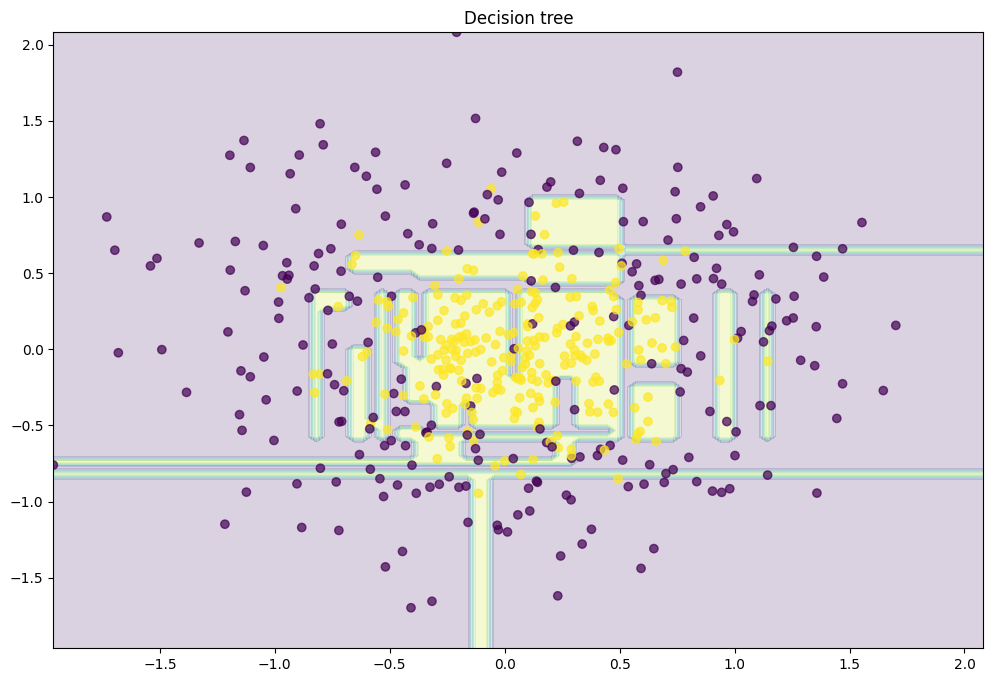

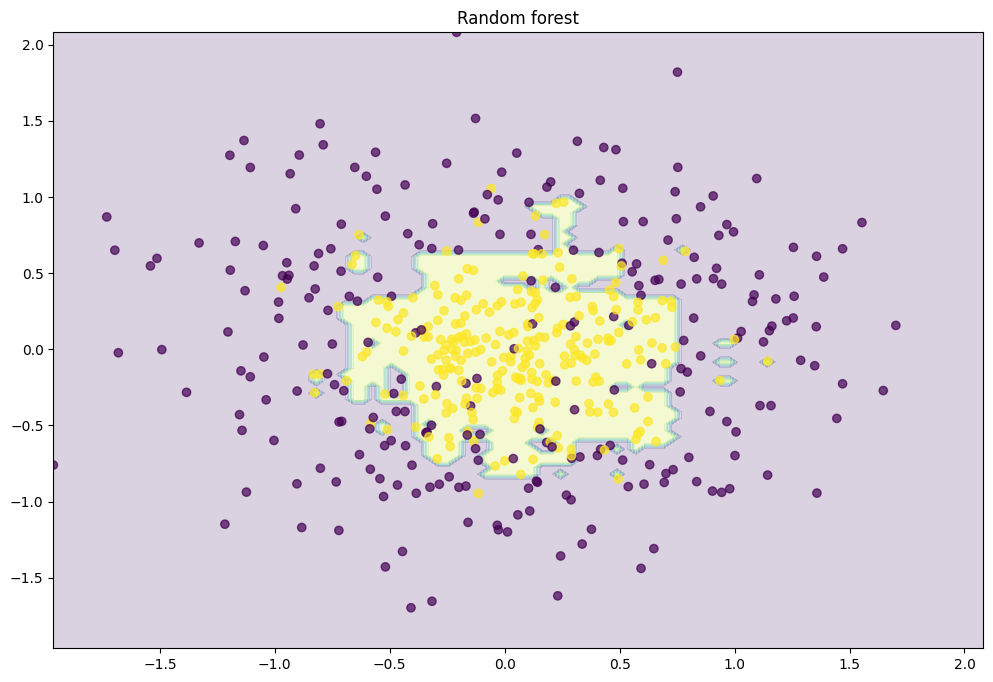

In [14]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = dtree.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
plt.title("Decision tree")
plt.show()

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = rf.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
plt.title("Random forest")
plt.show()

In [15]:
n_train = 150        
n_test = 1000       
noise = 0.1

# Generate data
def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2)\
        + np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))

    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

(-5.0, 5.0)

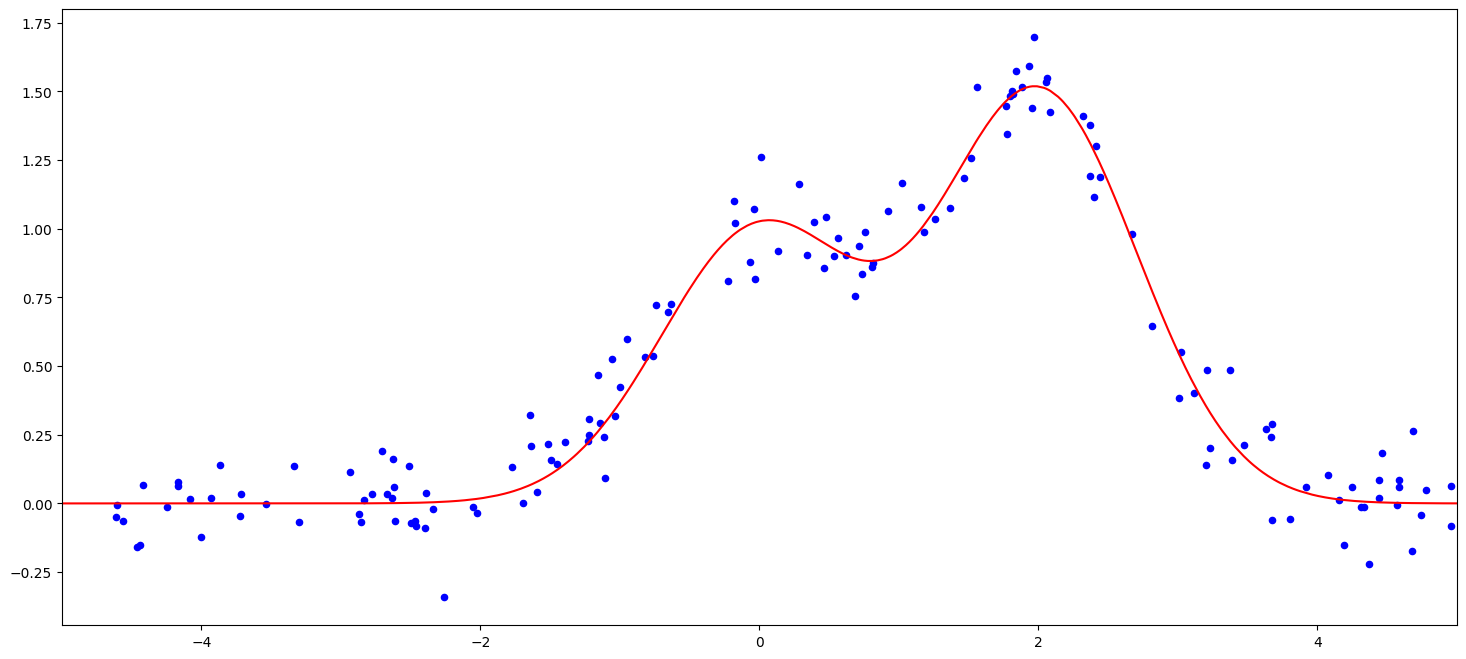

In [16]:
plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.xlim([-5, 5])

Text(0.5, 1.0, 'Decision tree, MSE = 22.70')

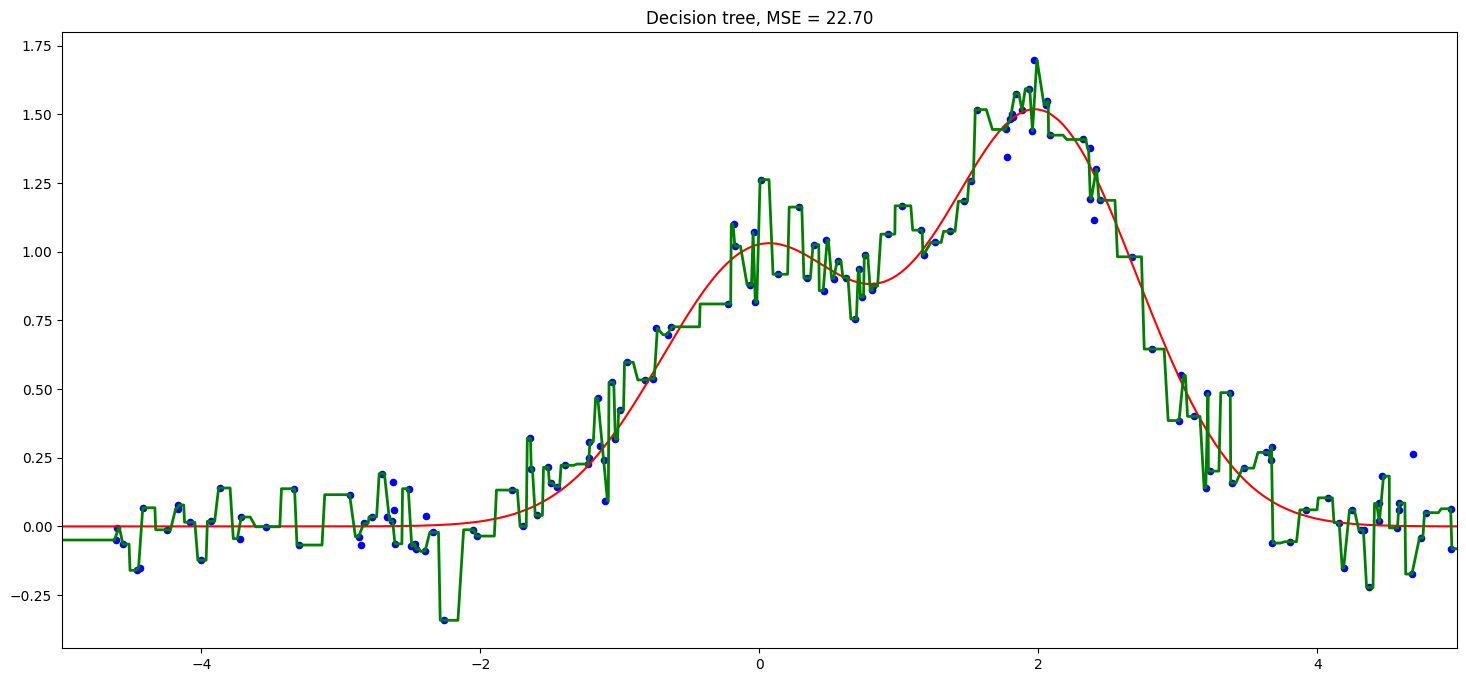

In [17]:
# One decision tree regressor
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor().fit(X_train, y_train)
d_predict = dtree.predict(X_test)

plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, d_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree, MSE = %.2f" 
          % np.sum((y_test - d_predict) ** 2))

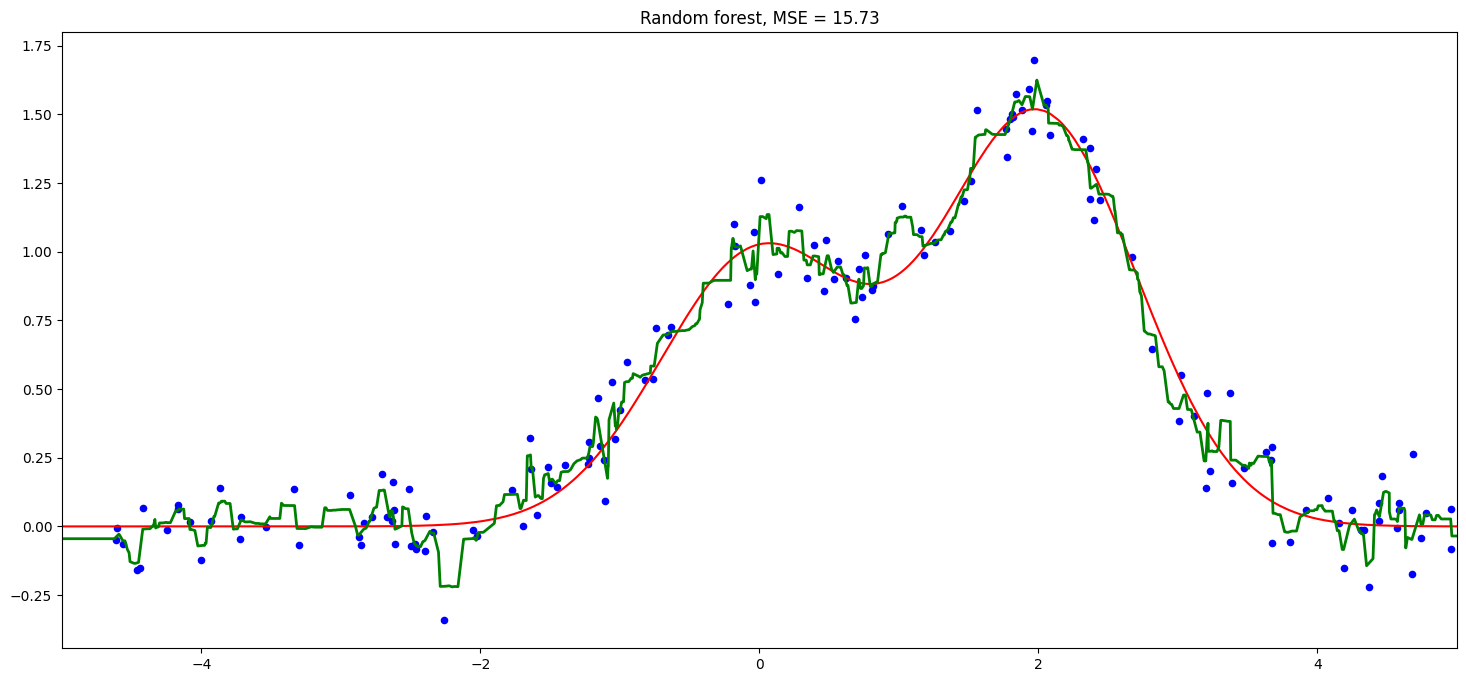

In [18]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=1000).fit(X_train, y_train)
rf_predict = rfr.predict(X_test)

plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, rf_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Random forest, MSE = %.2f" % np.sum((y_test - rf_predict) ** 2));

In [19]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)


df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,0.482079,1.841173,-2.217369,-2.036439,0.197381,1
1,0.380785,-0.124146,-1.401927,1.809635,-1.020447,0
2,0.270875,-1.069133,-2.016631,3.571289,-0.369521,0
3,1.405641,-1.826020,-2.905879,-0.414879,0.339778,0
4,0.854174,0.691846,-0.027003,-0.609300,-2.149680,0


In [20]:
def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [23]:
import random
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [24]:
def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [25]:
df1 = combined_sampling(df,0.5,0.5)

C:\Users\Debdutta Chatterjee\AppData\Local\Temp\ipykernel_21968\3161237612.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [26]:
df2 = combined_sampling(df,0.5,0.5)
df3 = combined_sampling(df,0.5,0.5)

print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col4', 'col1', 'target'], dtype='object')
Index(['col4', 'col5', 'target'], dtype='object')
Index(['col4', 'col5', 'target'], dtype='object')


C:\Users\Debdutta Chatterjee\AppData\Local\Temp\ipykernel_21968\3161237612.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']
C:\Users\Debdutta Chatterjee\AppData\Local\Temp\ipykernel_21968\3161237612.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


[Text(0.5, 0.9375, 'x[0] <= 0.382\ngini = 0.487\nsamples = 50\nvalue = [29.0, 21.0]'),
 Text(0.4090909090909091, 0.8125, 'x[0] <= -1.429\ngini = 0.451\nsamples = 32\nvalue = [11, 21]'),
 Text(0.4545454545454546, 0.875, 'True  '),
 Text(0.3181818181818182, 0.6875, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.5, 0.6875, 'x[0] <= 0.239\ngini = 0.493\nsamples = 25\nvalue = [11.0, 14.0]'),
 Text(0.4090909090909091, 0.5625, 'x[1] <= 0.716\ngini = 0.499\nsamples = 21\nvalue = [11, 10]'),
 Text(0.18181818181818182, 0.4375, 'x[0] <= -0.198\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(0.09090909090909091, 0.3125, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.2727272727272727, 0.3125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6363636363636364, 0.4375, 'x[1] <= 1.694\ngini = 0.426\nsamples = 13\nvalue = [9, 4]'),
 Text(0.45454545454545453, 0.3125, 'x[0] <= -0.354\ngini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(0.36363636363636365, 0.1875, 'gini = 0.0\nsamples = 7\

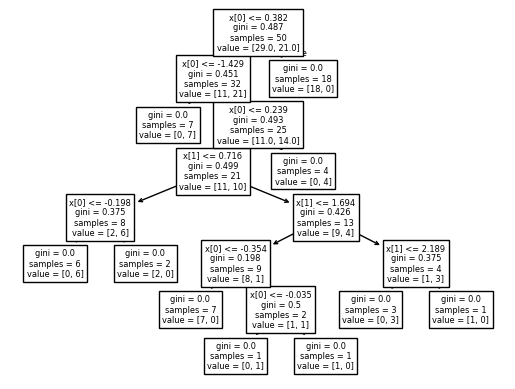

In [27]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

from sklearn.tree import plot_tree

plot_tree(clf1)